In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [7]:
df = pd.read_csv("../data/creditcard.csv")

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Key observations:

Size of the DataFrame:
    The DataFrame contains 284,807 entries (rows).
    There are 31 columns in total.

Non-null Counts:
    All columns have 284,807 non-null values, indicating there are no missing values in the dataset.

Data Types:
    The majority of the columns (30 out of 31) are of type float64, which suggests that they hold continuous numerical data.
    Only one column, Class, is of type int64, typically indicating a categorical variable or a label (often used in classification tasks).

Memory Usage:
    The DataFrame uses approximately 67.4 MB of memory, which is relatively efficient for the amount of data it holds.

Column Breakdown:
    The columns are prefixed with V (from V1 to V28), indicating they may represent different features or variables, commonly found in datasets used for machine learning tasks (e.g., anomaly detection).
    The Amount column represents a monetary value, while the Class column suggests the data is for a classification problem, possibly distinguishing between normal and fraudulent transactions since this is a financial dataset.

Summary:
    The dataset is complete, with no missing values and a mix of float and integer data types. The structure suggests it may be used for predictive modeling in a financial context.

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values in this dataset, but always verify

In [11]:
# Checkl for duplicates and remove if present
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 1081


In [13]:
# Removing duplicates
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


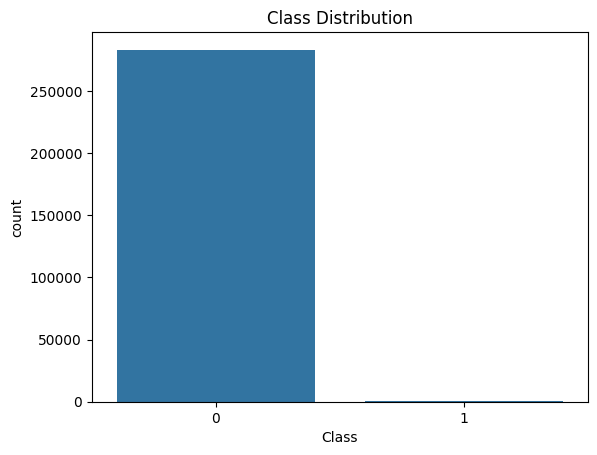

Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


In [14]:
# Since fraud detection is a classification problem, we meed to check if the dataset is imbalanced
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()

fraud_count = df['Class'].value_counts(normalize=True) * 100
print(fraud_count)

Key Observations:
Very imbalanced dataset (fraud cases ≈ 0.17% of the total)

This confirms we will need oversampling (SMOTE) or undersampling later.

In [15]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Descriptive Statistics:
Time: The mean value is 94,811.08 with a standard deviation of 47,481.05, indicating a wide range of time values. The minimum is 0 and the maximum is 172,792, suggesting a time span that likely covers many transactions.

V1 to V28: These variables have varying means and standard deviations, indicating different distributions. Most have means close to 0, with some negative and positive values, suggesting they might be standardized features.

Amount: The mean amount is 88.47, with a relatively high standard deviation of 250.40, indicating significant variability in transaction amounts. The minimum amount is 0 and the maximum is 25,691.16.

Class: This column is binary, with a maximum value of 1 and a minimum of 0, indicating it is used for classification (e.g., normal vs. fraudulent).

Distribution Insights:
The 25th percentile (Q1) and 75th percentile (Q3) for most variables suggest that many features have values that are tightly clustered around the median (50th percentile), with some outliers, particularly in the V columns.
The standard deviations for the V columns vary significantly, indicating some features are more volatile than others.

Potential Issues:
The high variability in the Amount column relative to its mean suggests that outliers could be influencing the results, which may need further investigation.

Overall Structure:
The DataFrame contains 31 columns, mostly numerical, indicating it is suitable for machine learning tasks, particularly classification and regression analyses.

Summary
The dataset is complete. It contains various numerical features with different distributions, indicating great suitability for analysis in a financial context, in this case for detecting anomalies or fraud. The presence of outliers and variability in certain key metrics suggests careful preprocessing will be required for effective modeling.

In [17]:
# Since Amount and Time are not transformed like V1-V28, we normalize them
scaler = StandardScaler()
df['Scaled_Amount'] = scaler.fit_transform(df[['Amount']])
df['Scaled_Time'] = scaler.fit_transform(df[['Time']])

# Drop original columns
df.drop(columns=['Amount', 'Time'], inplace=True)
print(df.head())

KeyError: "None of [Index(['Amount'], dtype='object')] are in the [columns]"

In [18]:
print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  Scaled_Amount  Scaled_Time  

Great! Now, we have Scaled_Amount and Scaled_Time.

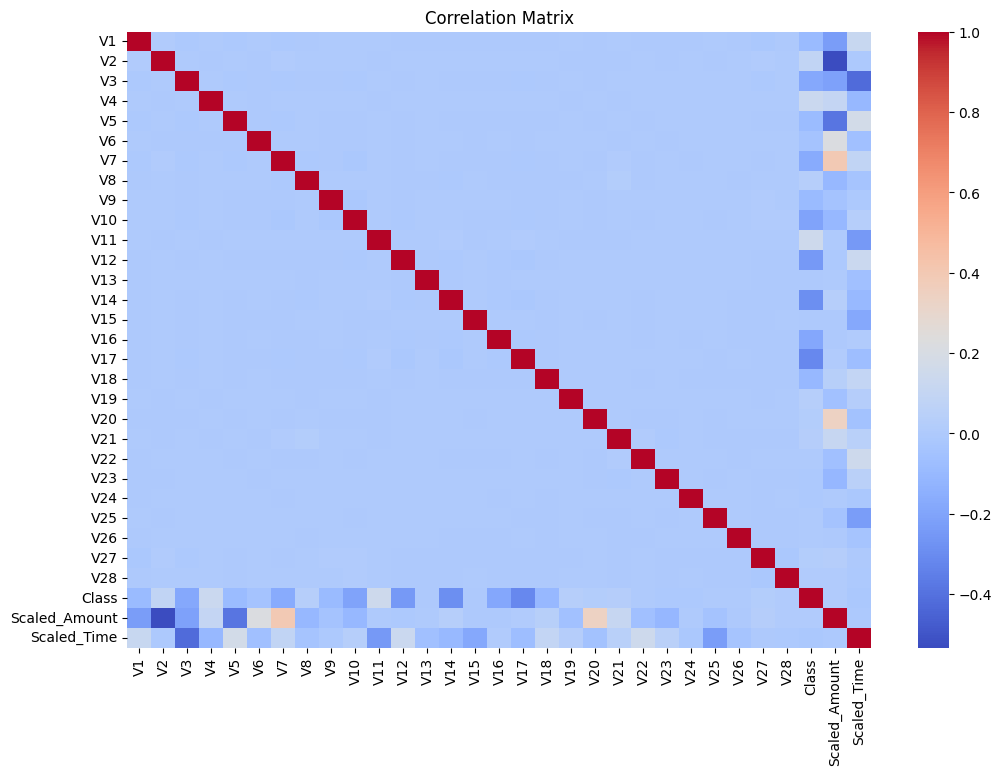

In [19]:
# To see how features are related:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()

Overall Structure:
The heatmap displays the correlation values between all pairs of features, with colors indicating the strength and direction of the correlations.

Strong Positive Correlations:
Look for dark red areas, which indicate strong positive correlations (close to 1). Features that are highly correlated may provide redundant information for modeling.

Strong Negative Correlations:
Dark blue areas represent strong negative correlations (close to -1). These features move in opposite directions, which can be insightful for understanding relationships in the data.

Weak Correlations:
Lighter colors (pale blue or white) indicate weak correlations (close to 0). These features may not provide significant predictive power and could be candidates for removal.

Class Correlation:
Investigate how the Class feature correlates with other features. A strong correlation (positive or negative) with Class is particularly important, as it indicates potential predictors for classification.

Scaled Features:
The correlations for Scaled_Amount and Scaled_Time should be examined. Their relationships with other features can provide insights into how these scaled values interact with the original features.

Multicollinearity:
If several V features show high correlations with each other, it suggests multicollinearity, which might complicate model training and interpretation.

Feature Selection:
The heatmap guides feature selection and engineering. Features with low correlation to the target variable (Class) or high redundancy may be dropped to simplify the model.

Summary
The correlation matrix heatmap provides a visual representation of the relationships among features. Key observations include identifying strong positive or negative correlations, assessing the relevance of features to the target variable, and recognizing multicollinearity. This analysis will inform our decisions regarding feature selection and model building.

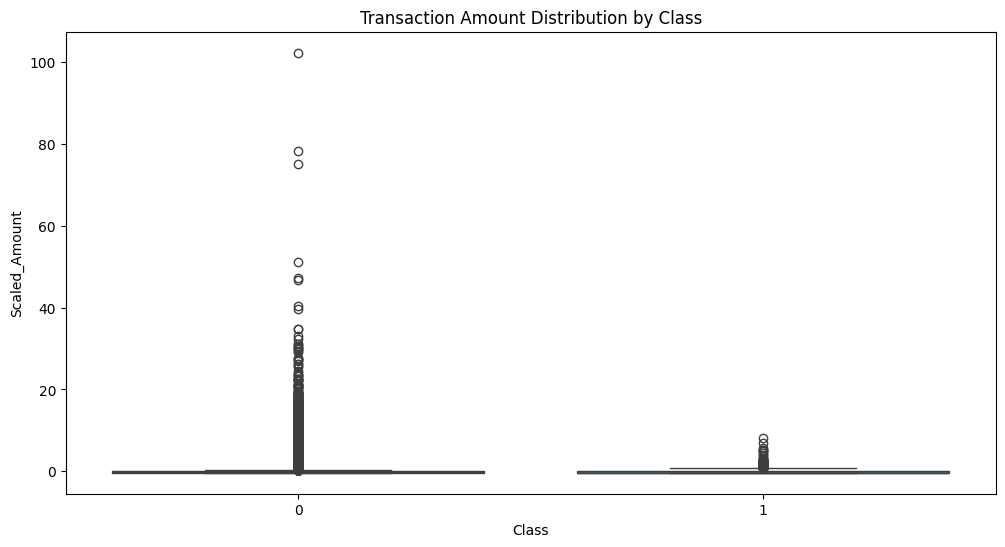

In [20]:
# Outlier Detection
# Fraud transactions often have outliers
plt.figure(figsize=(12,6))
sns.boxplot(x='Class', y='Scaled_Amount', data=df)
plt.title("Transaction Amount Distribution by Class")
plt.show()

Key Observations:

Class Distribution:
The plot shows two distinct classes: 0 and 1. Class 0 likely represents normal transactions, while Class 1 may represent fraudulent transactions.

Transaction Amounts:
Class 0: The majority of transaction amounts are concentrated around lower values, with some outliers extending significantly higher. This suggests that most legitimate transactions involve smaller amounts, but there are occasional larger transactions.
Class 1: The distribution for Class 1 (fraudulent transactions) is notably different, with a much tighter range of amounts. Most fraudulent transactions appear to cluster around very low amounts, with few outliers also present.

Outliers:
There are significant outliers in Class 0, indicating that while most transactions are small, there are some high-value transactions that might warrant further investigation.
The outliers in Class 1 are less pronounced, reflecting a different pattern of fraudulent transactions, which may indicate that fraudsters are often making lower-value transactions.

Potential Fraud Patterns:
The data suggests that fraudulent transactions (Class 1) are not typically associated with high amounts, which could indicate a strategy of making low-value transactions to avoid detection.

Implications for Model Training:
The stark difference in transaction amount distributions between the two classes can inform feature selection and engineering. This feature (transaction amount) may be a significant predictor for distinguishing between the two classes.

Class Imbalance:
If the count of Class 1 (fraudulent transactions) is significantly lower than Class 0, this could indicate a class imbalance issue, which is important to consider during model training.

Summary
The boxplot reveals distinct distributions of transaction amounts for each class, with Class 0 showing a wide range of higher amounts and Class 1 clustering around lower values. This difference can inform modeling strategies and highlight potential patterns in fraudulent behavior, as well as suggest the importance of the transaction amount feature in classification tasks.

In [22]:
# After cleaning and scaling, save the dataset
df.to_csv("../data/processed_creditcard.csv", index=False)